<a href="https://colab.research.google.com/github/CHIAI11123024/AI-/blob/main/AI_%E5%88%A9%E7%94%A8%E7%A5%9E%E7%B6%93%E7%B6%B2%E7%B5%A1%E8%A3%BD%E4%BD%9C%E4%B8%80%E4%B8%AA%E8%AD%98%E5%88%A5%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E7%9A%84%E7%A8%8B%E5%BA%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras numpy mnist matplotlib
 # 导入数据包
import numpy as np
import mnist  # 获得数据集
import matplotlib.pyplot as plt  # Graph
from keras.models import Sequential  # ANN 网络结构
from keras.layers import Dense # the layer in  the  ANN
import keras
import keras.utils
from keras import utils as np_utils

In [ ]:
# 导入数据
train_images = mnist.train_images()  # 训练数据集图片
train_labels = mnist.train_labels()   # 训练标签
test_images = mnist.test_images()  # 测试图片
test_labels = mnist.test_labels()  # 测试标签


In [ ]:
# 规范化图片   规范化像素值[0,255]
# 为了使神经网络更好的训练，我们把值设置为[-0.5 , 0.5]
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5
# 将 28 * 28 像素图片展成 28 * 28 = 784 维向量
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))
#打印出来
print(train_images.shape) # 6000个训练数据
print(test_images.shape) # 1000个测试数据


(60000, 784)
(10000, 784)


In [ ]:
# 建立模型
# 3层 ，其中两层 64 个神经元 以及激励函数  一层10个神经元 以及归一化指数函数（softmax fuction）
model = Sequential()
model.add( Dense(64, activation="relu", input_dim = 784))
model.add( Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.3554 - accuracy: 0.8944
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1887 - accuracy: 0.9433
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1461 - accuracy: 0.9554
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1239 - accuracy: 0.9621
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1098 - accuracy: 0.9660
dict_keys(['loss', 'accuracy'])


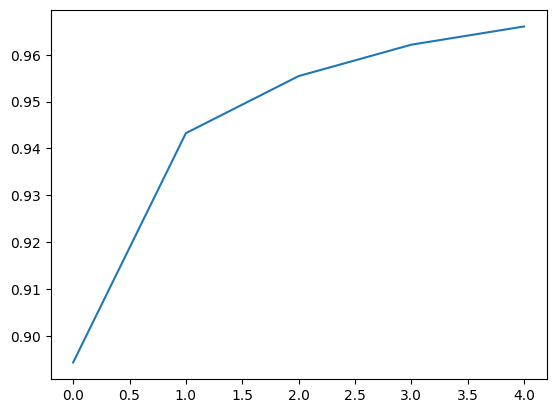

In [ ]:
# 编译模型
# 损失函数衡量模型在训练中的表现 然后进行优化
model.compile(
    optimizer = 'adam',
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)
# 训练模型
#from keras.utils.np_utils import to_categorical
from tensorflow.keras import utils

history=model.fit(
    train_images,
    #to_categorical(train_labels),
    utils.to_categorical(train_labels),
    epochs = 5,  #要训​​练的整个数据集的迭代次数
    batch_size = 32  #每个梯度更新的样本数以进行训练

)

print(history.history.keys())
# print(plt.plot(history.history['loss']))
print(plt.plot(history.history['accuracy']))



In [ ]:
from PIL import Image
import numpy as np
import os
img = Image.open("/content/drive/My Drive/data/test.png").convert("1")

img = np. resize (img, (28,28,1))
im2arr = np.array(img)
im2arr = im2arr.reshape (1,784)
y_pred = model.predict (im2arr)
print(np.argmax(y_pred, axis = 1))

1/1 [==============================] - 0s 23ms/step
[7]


In [ ]:
# 評估模型
model.evaluate(
    test_images,
    utils.to_categorical(test_labels)
)

313/313 [==============================] - 2s 4ms/step - loss: 0.1179 - accuracy: 0.9628


[0.1178896352648735, 0.9628000259399414]

In [ ]:
# 保存模型
# 預測前五個圖片


predictions = model.predict(test_images[:5])
# 輸出模型預測 同時和標準值進行比較
print(np.argmax(predictions, axis = 1))
print(test_labels[:5])

1/1 [==============================] - 0s 340ms/step
[7 2 1 0 4]
[7 2 1 0 4]


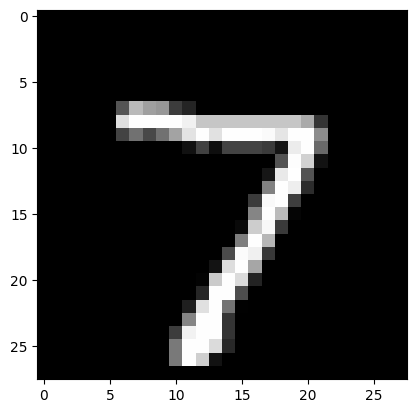

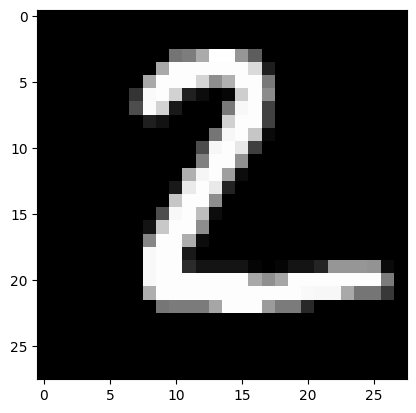

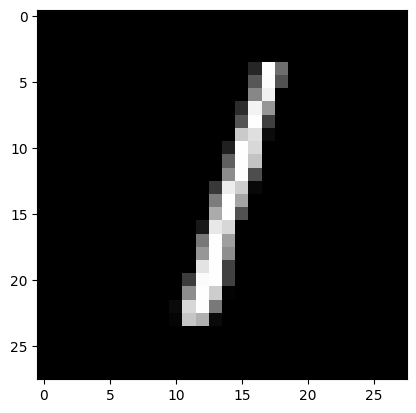

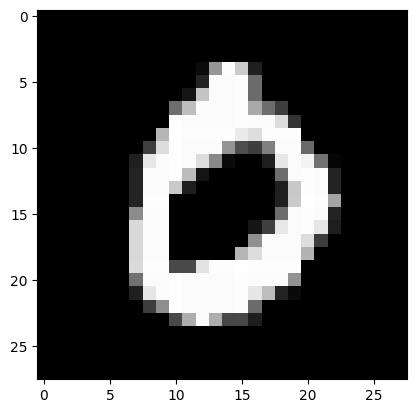

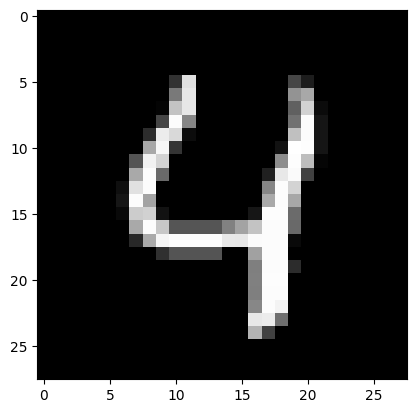

In [ ]:
for i in range(0,5):
  first_image = test_images[i]
  first_image = np.array(first_image ,dtype= "float")
  pixels = first_image.reshape((28 ,28))
  plt.imshow(pixels , cmap="gray")
  plt.show()

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/data"

os.chdir(path)
os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['test.png']